# Antigravity Sports Analytics - Pipeline Test Notebook

This notebook verifies the functionality of the data ingestion and update scripts (`ingest_data.py` and `update_data.py`).

## 1. Setup & Imports

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Project Root: {project_root}")

# Import scripts
from scripts import ingest_data
from scripts import update_data

Project Root: /Users/varunkadikar/Desktop/personal_projects/Antigravity/sports_analytics


## 2. Testing `ingest_data.py`

Testing Fantrax connection and player list retrieval.

In [2]:
print("Connecting to Fantrax...")
session = ingest_data.connect_fantrax()
print("Session created.")

# Check cookies
print(f"Cookies loaded: {len(session.cookies)}")

Connecting to Fantrax...
Session created.
Cookies loaded: 26


In [3]:
print("Fetching all players (this usually iterates pages)...")
# Note: This might take a minute if it runs the full loop
df_players = ingest_data.get_all_players(session)

print(f"Total Players Fetched: {len(df_players)}")
display(df_players.head())

Fetching all players (this usually iterates pages)...
Fetching player list...
Total pages to fetch: 44
Fetched page 1/44
Fetched page 2/44
Fetched page 3/44
Fetched page 4/44
Fetched page 5/44
Fetched page 6/44
Fetched page 7/44
Fetched page 8/44
Fetched page 9/44
Fetched page 10/44
Fetched page 11/44
Fetched page 12/44
Fetched page 13/44
Fetched page 14/44
Fetched page 15/44
Fetched page 16/44
Fetched page 17/44
Fetched page 18/44
Fetched page 19/44
Fetched page 20/44
Fetched page 21/44
Fetched page 22/44
Fetched page 23/44
Fetched page 24/44
Fetched page 25/44
Fetched page 26/44
Fetched page 27/44
Fetched page 28/44
Fetched page 29/44
Fetched page 30/44
Fetched page 31/44
Fetched page 32/44
Fetched page 33/44
Fetched page 34/44
Fetched page 35/44
Fetched page 36/44
Fetched page 37/44
Fetched page 38/44
Fetched page 39/44
Fetched page 40/44
Fetched page 41/44
Fetched page 42/44
Fetched page 43/44
Fetched page 44/44
Total Players Fetched: 875


,teamName,urlName,headshotUrl,scorerId,upcomingEventStatusId,rank,teamLogo,posIdsNoFlex,defaultPosId,posShortNames,...,minorsEligible,posIds,teamId,name,teamShortName,shortName,next_match,fpts,fpts_per_game,statusId
0,Manchester City,erling-haaland,https://fantraximg.com/assets/images/logos/spo...,061vq,2,1,True,[701],701,F,...,False,[701],110080,Erling Haaland,MCI,E. Haaland,@TOT<br/>Sun 11:30AM,348.5,15.15,NaN
1,Manchester United,bruno-miguel-borges-fernandes,https://fantraximg.com/assets/images/logos/spo...,05gcr,2,2,True,[702],702,M,...,False,[702],110090,Bruno Fernandes,MUN,Bruno Fernandes,FUL<br/>Sun 9:00AM,310.5,15.53,NaN
2,Manchester City,antoine-semenyo,https://fantraximg.com/assets/images/logos/spo...,068y0,2,3,True,[701],701,F,...,False,[701],110080,Antoine Semenyo,MCI,A. Semenyo,@TOT<br/>Sun 11:30AM,302.5,13.75,NaN
3,Arsenal,bukayo-saka,https://fantraximg.com/assets/images/logos/spo...,04y92,2,4,True,[702],701,M,...,False,[702],110000,Bukayo Saka,ARS,B. Saka,@LEE<br/>Sat 10:00AM,286,13.62,NaN
4,Arsenal,declan-rice,https://fantraximg.com/assets/images/logos/spo...,04agz,2,5,True,[702],702,M,...,False,[702],110000,Declan Rice,ARS,D. Rice,@LEE<br/>Sat 10:00AM,279.5,12.7,NaN


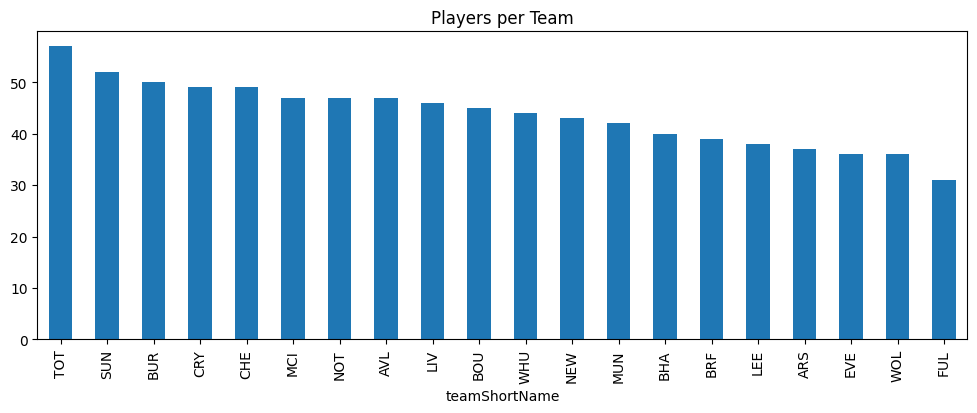

In [4]:
# Visualization: Players by Team
if not df_players.empty:
    df_players['teamShortName'].value_counts().plot(kind='bar', figsize=(12, 4), title='Players per Team')
    plt.show()

## 3. Testing `update_data.py`

Testing logical components: Matchups, Standings, Data Preprocessing, and Predictions.

In [5]:
print("Initializing Fantrax API wrapper from update_data...")
api = update_data.connect_fantrax()
print("API wrapper ready.")

Initializing Fantrax API wrapper from update_data...
API wrapper ready.


### 3.1 Matchups & Standings

In [6]:
print("Fetching matchups...")
matchups_df, matchup_list = update_data.get_matchups(api)

print(f"Total Matchup Rows (Flattened): {len(matchups_df)}")
display(matchups_df.head())

# Check schema for density keys
print("Columns:", matchups_df.columns.tolist())

Fetching matchups...
Fetching matchups...
Total Matchup Rows (Flattened): 532


,week,team,team_id,score,opponent,opponent_score,is_home
0,1,Arnie-senal,mqmbxwrtmdg6mr2l,83.00,FC VAR,80.50,1
1,1,FC VAR,1t98phesmd5cytbv,80.50,Arnie-senal,83.00,0
2,1,Cold FC,ja8ivcs5mdew697k,123.75,youngmoon,66.25,1
3,1,youngmoon,s5ksmx70mdmj1kxc,66.25,Cold FC,123.75,0
4,1,WayneRooney10,cvw1xxnsmdg4tqui,102.75,sduvuuru,77.75,1


Columns: ['week', 'team', 'team_id', 'score', 'opponent', 'opponent_score', 'is_home']


In [7]:
print("Calculating Standings...")
standings = update_data.calculate_standings(matchups_df)
display(standings)

Calculating Standings...
Calculating standings...


,team,win,draw,loss,points,fpts_for,fpts_against,record,rank
0,FC VAR,16,0,7,48,2094.75,1753.00,16-0-7,1
1,Toadenham Frogspur,14,1,8,43,1863.50,1667.75,14-1-8,2
2,youngmoon,14,0,9,42,1921.00,1947.50,14-0-9,3
3,Arnie-senal,13,0,10,39,1768.00,1835.50,13-0-10,4
4,Wallalujah FC,12,0,11,36,2113.75,1919.00,12-0-11,5
5,Traderjoe18,12,0,11,36,1981.75,1839.00,12-0-11,6
6,Smip Estonian,12,0,11,36,1917.50,1788.25,12-0-11,7
7,Cold FC,12,0,11,36,1883.00,1846.25,12-0-11,8
8,FC Purulona,12,0,11,36,1800.75,1829.50,12-0-11,9
9,sduvuuru,11,0,12,33,1856.75,1902.00,11-0-12,10


### 3.2 Data Preprocessing (Densification Verification)

We will load the aggregated historical data (the source of truth) using `load_aggregated_stats` to verify that the preprocessing logic correctly densifies the data (adds 0-stat rows for missing weeks).


In [8]:
# Load aggregated data using update_data's helper
print("Loading aggregated stats from weekly files...")
# update_data.load_aggregated_stats requires base_dir (parent of scripts, which is project root)
base_dir = project_root
df_raw = update_data.load_aggregated_stats(base_dir)

if not df_raw.empty:
    print(f"Loaded {len(df_raw)} rows of aggregated data.")
    # Ensure correct types for raw load
    df_raw['matchweek'] = df_raw['matchweek'].fillna(-1).astype(int)
else:
    print("No aggregated data found! Cannot full test preprocessing.")

Loading aggregated stats from weekly files...
Found 24 weekly stat files. Aggregating...
Loaded 7465 rows of aggregated data.


In [9]:
if not df_raw.empty:
    print("Running preprocess_player_stats (with densification)...")
    # We need df_players and matchups_df from previous steps
    processed_df = update_data.preprocess_player_stats(df_raw, df_players, matchups_df)
    
    display(processed_df.head())
    
    # VERIFICATION: Check for 0-minute rows (densified data)
    zero_min_rows = processed_df[processed_df['min'] == 0]
    print(f"Rows with 0 minutes (Densified + actual bench): {len(zero_min_rows)}")
    
    # Check a specific player known to have missing weeks if possible
    # e.g. check standard deviation of matchweeks per player
    mw_counts = processed_df.groupby('player_id')['matchweek'].count()
    print("\nMatchweeks per player (Should be uniform = max_week):")
    print(mw_counts.value_counts().sort_index())
    
    # Check for NaN in critical columns
    print("\nNaN Check in Features:")
    cols_to_check = ['g_per_90_season', 'positional_avg_g_per_90_season', 'matchweek', 'is_home']
    for c in cols_to_check:
        if c in processed_df.columns:
            print(f"{c}: {processed_df[c].isna().sum()} NaNs")
else:
    print("Skipping preprocessing test due to missing raw data.")

Running preprocess_player_stats (with densification)...
Pre-processing player stats (Strict Notebook Logic)...
Densifying data to include non-playing weeks...
Stats rows before densify: 7465
Skeleton rows: 21000
Stats rows after densify: 21000 (Matches found with stats: 7465)


,player_id,matchweek,date,team,opp,score,fpts,min,g,kp,...,positional_avg_positional_avg_sv_per_90_season,positional_avg_positional_avg_pks_per_90_season,positional_avg_positional_avg_hcs_per_90_season,positional_avg_positional_avg_sm_per_90_season,positional_avg_yc_per_90_season,positional_avg_rc_per_90_season,positional_avg_pkm_per_90_season,positional_avg_pkd_per_90_season,positional_avg_og_per_90_season,positional_avg_ga_per_90_season
0,061vq,1,2025-08-16,MCI,WOL,W 4-0,24.0,72.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.170639,0.0,0.007674,0.014809,0.004856,0.0
1,061vq,2,2025-08-23,MCI,TOT,L 0-2,3.0,90.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.138501,0.0,0.011243,0.017238,0.000000,0.0
2,061vq,3,2025-08-31,MCI,BHA,L 1-2,17.0,90.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.135375,0.0,0.002205,0.014588,0.000000,0.0
3,061vq,4,2025-09-14,MCI,MUN,W 3-0,28.5,86.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.223876,0.0,0.011260,0.010134,0.001114,0.0
4,061vq,5,2025-09-21,MCI,ARS,T 1-1,13.0,75.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.128902,0.0,0.005814,0.009194,0.000000,0.0


Rows with 0 minutes (Densified + actual bench): 14031

Matchweeks per player (Should be uniform = max_week):
matchweek
24    875
Name: count, dtype: int64

NaN Check in Features:
g_per_90_season: 0 NaNs
matchweek: 0 NaNs


### 3.3 Modeling & Prediction

Testing the training and prediction functions.

Encoding data for model test...
Training models...
Trained models for 96 stat-position pairs.
Generating sample predictions...


,player_id,player_name,team,opp,position,g,kp,at,sot,tkw,...,pkm,pkd,og,gao,cs,ga,sv,pks,hcs,sm
0,061vq,Erling Haaland,MCI,WOL,F,1.2,0.3,0.2,1.3,0.0,...,0.1,0.0,0.0,0.2,0.8,0.0,0.0,0.0,0.0,0.0
1,061vq,Erling Haaland,MCI,TOT,F,0.2,0.7,0.0,0.1,0.0,...,0.1,0.0,0.0,1.6,0.1,0.0,0.0,0.0,0.0,0.0
2,061vq,Erling Haaland,MCI,BHA,F,1.0,0.3,0.0,2.2,0.0,...,0.0,0.0,0.0,2.0,0.1,0.0,0.0,0.0,0.0,0.0
3,061vq,Erling Haaland,MCI,MUN,F,1.0,0.8,0.0,1.8,0.2,...,0.1,0.0,0.1,0.2,0.7,0.0,0.0,0.0,0.0,0.0
4,061vq,Erling Haaland,MCI,ARS,F,0.9,0.3,0.0,1.9,0.0,...,0.0,0.0,0.0,0.7,0.8,0.0,0.0,0.0,0.0,0.0


Calculating Fantasy Points for predictions...


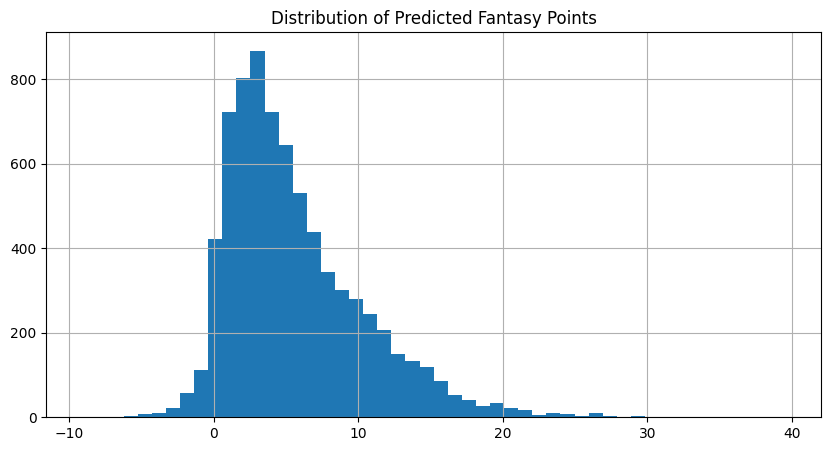

In [10]:
if not df_raw.empty and 'processed_df' in locals():
    # Manually define target stats (calc_stats is local to main in update_data.py)
    target_stats = ['g', 'kp', 'at', 'sot', 'tkw', 'dis', 'yc', 'rc', 'acnc', 'int', 'clr', 'cos', 'bs', 'aer', 'pkm', 'pkd', 'og', 'gao', 'cs', 'ga', 'sv', 'pks', 'hcs', 'sm']
    
    # Setup simple train/test split simulation
    # For test, we just use the whole dataset as training set to verify func works
    current_week = 24 # Mock

    # Encode features (using update_data helper if available, or reproducing simple encoding)
    # update_data doesn't export encoding helper easily, it does it in main or predict functions.
    # Let's see if we can perform a minimal test of `train_position_models` by manually preparing encoded df.
    
    print("Encoding data for model test...")
    # We need codes for categorical vars
    df_encoded = processed_df.copy()
    for col in ['player_id', 'team', 'opp_clean', 'position']:
        if col in df_encoded.columns:
            df_encoded[f'{col}_code'] = df_encoded[col].astype('category').cat.codes
            
    print("Training models...")
    models = update_data.train_position_models(df_encoded, target_stats)
    
    print(f"Trained models for {len(models)} stat-position pairs.")
    
    # Test Prediction
    print("Generating sample predictions...")
    preds = update_data.predict_with_models(models, df_encoded, target_stats)
    
    display(preds.head())
    
    # Visualize distribution of predicted points (if calc possible)
    # We need get_fantasy_score function
    if 'predicted_fpts' not in preds.columns:
        # The raw predict_with_models returns stats, not FPTS. 
        # calc_fantasy_points is embedded in main loop usually.
        # We can try to apply get_fantasy_score manually
        print("Calculating Fantasy Points for predictions...")
        preds['predicted_fpts'] = preds.apply(update_data.get_fantasy_score, axis=1)
        
    preds['predicted_fpts'].hist(bins=50, figsize=(10, 5))
    plt.title("Distribution of Predicted Fantasy Points")
    plt.show()

else:
    print("Skipping model test.")

In [12]:
preds.player_name.value_counts()

player_name
Erling Haaland      24
Martin Dubravka     24
Beto                24
Bernd Leno          24
Maxence Lacroix     24
                    ..
Tyler Fredricson     2
Tyrell Malacia       2
Kai Havertz          2
Pedro Lima           2
Alex Tóth            2
Name: count, Length: 496, dtype: int64